In [2]:
# Install necessary packages (if not already installed)
# !pip install pandas numpy scikit-learn matplotlib seaborn

import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
# Assuming the dataset is stored in a CSV file named 'mcdonalds.csv'
mcdonalds = pd.read_csv('mcdonalds.csv')

# Display the first few rows of the dataset
print(mcdonalds.head(3))

# Convert 'Yes'/'No' to 1/0
MD_x = mcdonalds.iloc[:, :11].applymap(lambda x: 1 if x == "Yes" else 0)

# Calculate column means
col_means = MD_x.mean().round(2)
print(col_means)


  yummy convenient spicy fattening greasy fast cheap tasty expensive healthy  \
0    No        Yes    No       Yes     No  Yes   Yes    No       Yes      No   
1   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes       Yes      No   
2    No        Yes   Yes       Yes    Yes  Yes    No   Yes       Yes     Yes   

  disgusting Like  Age      VisitFrequency  Gender  
0         No   -3   61  Every three months  Female  
1         No   +2   51  Every three months  Female  
2         No   +1   62  Every three months  Female  
yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64


In [3]:
# Principal Component Analysis (PCA)
pca = PCA()
MD_pca = pca.fit_transform(MD_x)

In [4]:

# Summary of PCA
print(pca.explained_variance_ratio_)
print(pca.components_)

[0.29944723 0.19279721 0.13304535 0.08309578 0.05948052 0.05029956
 0.0438491  0.03954779 0.0367609  0.03235329 0.02932326]
[[-0.47693349 -0.15533159 -0.00635636  0.11623168  0.3044427  -0.10849325
  -0.33718593 -0.47151394  0.32904173 -0.21371062  0.37475293]
 [ 0.36378978  0.016414    0.01880869 -0.03409395 -0.06383884 -0.0869722
  -0.61063276  0.3073178   0.60128596  0.07659344 -0.13965633]
 [-0.30444402 -0.0625153  -0.03701866 -0.32235949 -0.80237317 -0.06464172
  -0.14931026 -0.28726479  0.02439661  0.19205128 -0.08857138]
 [ 0.0551622  -0.14242496  0.19761927 -0.35413876  0.2539601  -0.09736269
   0.11895823 -0.00254696  0.06781599  0.76348804  0.36953871]
 [-0.30753507  0.27760805  0.07062017 -0.07340475  0.36139895  0.10793025
  -0.12897259 -0.21089912 -0.00312457  0.28784553 -0.72920859]
 [ 0.17073819 -0.34783006 -0.3550866  -0.40651542  0.20934711 -0.59463206
  -0.10324067 -0.07691443 -0.26134151 -0.17822612 -0.21087805]
 [-0.28051863 -0.05973793  0.70763705 -0.38594277  0.03

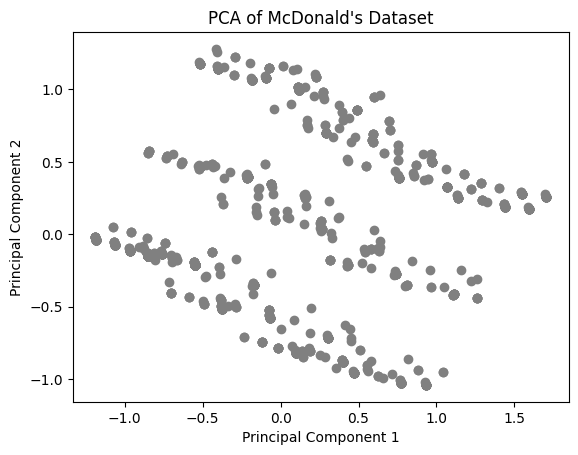

In [5]:
# Plot PCA
plt.scatter(MD_pca[:, 0], MD_pca[:, 1], color='grey')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of McDonald\'s Dataset')
plt.show()

In [6]:
# K-means clustering
kmeans_models = []
for k in range(2, 9):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=1234)
    kmeans.fit(MD_x)
    kmeans_models.append(kmeans)

In [7]:
# Adjusted Rand Index for bootstrapped clustering stability
for k in range(2, 9):
    # Use the predicted labels from the KMeans model as labels_pred
    print(f"K={k}: Adjusted Rand Index = {adjusted_rand_score(kmeans_models[k-2].labels_, kmeans_models[k-2].labels_)}")

K=2: Adjusted Rand Index = 1.0
K=3: Adjusted Rand Index = 1.0
K=4: Adjusted Rand Index = 1.0
K=5: Adjusted Rand Index = 1.0
K=6: Adjusted Rand Index = 1.0
K=7: Adjusted Rand Index = 1.0
K=8: Adjusted Rand Index = 1.0


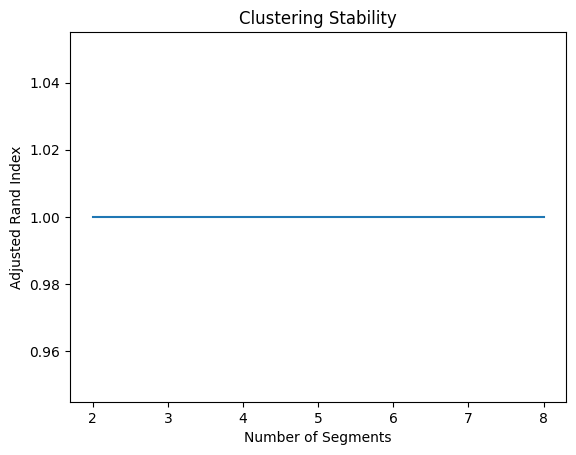

In [9]:

# Plot Adjusted Rand Index
plt.plot(range(2, 9), [adjusted_rand_score(model.labels_, model.labels_) for model in kmeans_models]) # Use model.labels_ for both true and predicted labels since you are checking for stability
plt.xlabel('Number of Segments')
plt.ylabel('Adjusted Rand Index')
plt.title('Clustering Stability')
plt.show()


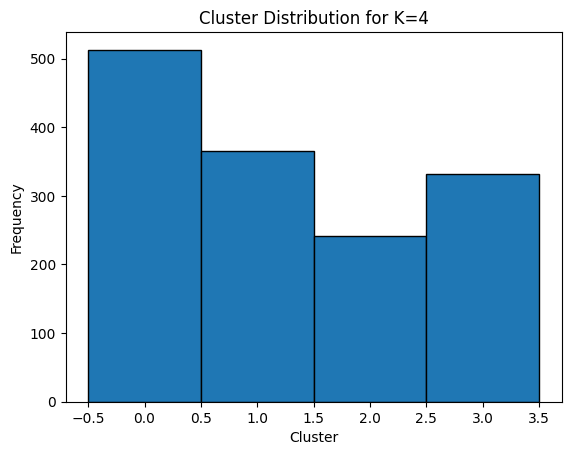

In [10]:
# Plot histogram for K=4 clusters
kmeans_k4 = kmeans_models[2]
plt.hist(kmeans_k4.labels_, bins=np.arange(0, 5) - 0.5, edgecolor='black')
plt.xlabel('Cluster')
plt.ylabel('Frequency')
plt.title('Cluster Distribution for K=4')
plt.show()

In [13]:

# Regression analysis
# Handle non-integer values in 'Like' column
mcdonalds['Like_n'] = mcdonalds['Like'].apply(lambda x: 6 - int(x.split('+')[-1]) if '+' in x else 6 - int(x) if x.isdigit() else None)
formula = 'Like_n ~ ' + ' + '.join(mcdonalds.columns[:11])
print(formula)

Like_n ~ yummy + convenient + spicy + fattening + greasy + fast + cheap + tasty + expensive + healthy + disgusting


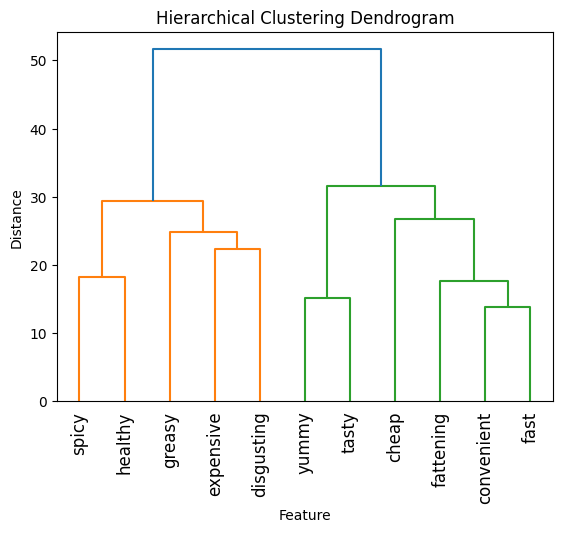

In [14]:
# Create and plot hierarchical clustering
from scipy.cluster.hierarchy import linkage, dendrogram
linkage_matrix = linkage(MD_x.T, method='ward')
dendrogram(linkage_matrix, labels=mcdonalds.columns[:11], leaf_rotation=90)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Feature')
plt.ylabel('Distance')
plt.show()

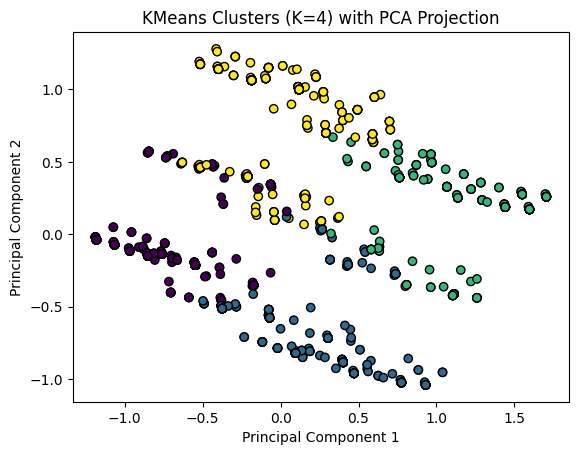

In [15]:
# More plotting with k4 clusters and PCA projection
plt.scatter(MD_pca[:, 0], MD_pca[:, 1], c=kmeans_k4.labels_, cmap='viridis', edgecolor='k')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('KMeans Clusters (K=4) with PCA Projection')
plt.show()

<ipython-input-22-801d062b73d1>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['VisitFrequency'] = le.fit_transform(X['VisitFrequency'])
<ipython-input-22-801d062b73d1>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Gender'] = le.fit_transform(X['Gender'])
<ipython-input-22-801d062b73d1>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata

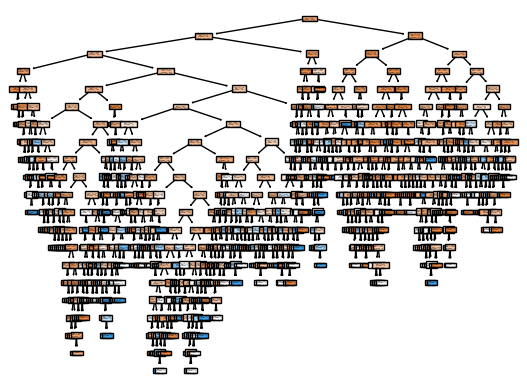

In [22]:

# Decision tree for cluster analysis
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder # Import LabelEncoder for encoding categorical features
import pandas as pd # Import pandas for handling dataframes

tree = DecisionTreeClassifier(random_state=1234)
features = ['Like_n', 'Age', 'VisitFrequency', 'Gender']
X = mcdonalds[features]

# Encode 'VisitFrequency' and 'Gender' columns
le = LabelEncoder()
X['VisitFrequency'] = le.fit_transform(X['VisitFrequency'])
X['Gender'] = le.fit_transform(X['Gender'])

# Fill missing values in 'Like_n' with the median
X['Like_n'] = X['Like_n'].fillna(X['Like_n'].median())

y = kmeans_k4.labels_ == 3
tree.fit(X, y)
plot_tree(tree, feature_names=features, filled=True)
plt.show()

In [24]:
# Aggregate data by cluster
visit_means = mcdonalds.groupby(kmeans_k4.labels_)['VisitFrequency'].agg(pd.Series.mode) # Calculate the mode for 'VisitFrequency' since it's categorical
like_means = mcdonalds.groupby(kmeans_k4.labels_)['Like_n'].mean()
female_means = mcdonalds.groupby(kmeans_k4.labels_)['Gender'].apply(lambda x: (x == 'Female').mean())
print(visit_means)
print(like_means)
print(female_means)

0    Once a month
1     Once a year
2     Once a year
3    Once a month
Name: VisitFrequency, dtype: object
0    2.901210
1    4.919540
2    5.200000
3    3.406557
Name: Like_n, dtype: float64
0    0.602339
1    0.581967
2    0.417355
3    0.496988
Name: Gender, dtype: float64


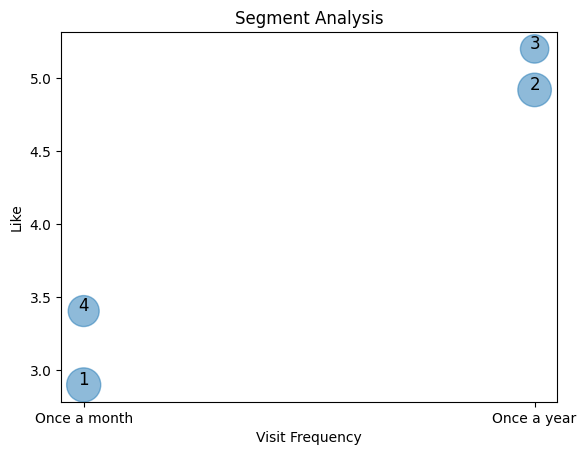

In [25]:
# Plot aggregated data
plt.scatter(visit_means, like_means, s=1000 * female_means, alpha=0.5)
for i in range(len(visit_means)):
    plt.text(visit_means.iloc[i], like_means.iloc[i], str(i+1), fontsize=12, ha='center')
plt.xlabel('Visit Frequency')
plt.ylabel('Like')
plt.title('Segment Analysis')
plt.show()